### **List of Group Members:**
**Student_ID Student_Name**

206123F Pabodini Udari

206061L Rasandie Kristhogu

---

# Coding Activity 01

# Clustering Exoplanets based on Features 🪐

# Question (A)

### (a) Perform an exploratory analysis of the data. Be sure to examine the univariate distributions of the variables and their bivariate relationships using appropriate plots and summary statistics.

## Load all necessary libraries

In [152]:
# Loading the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


## Loading the Dataset

In [153]:
planet_data = pd.read_csv('/content/planet.csv')
planet_data

,Mass,Period,Eccentricity
0,0.120,4.950000,0.000
1,0.197,3.971000,0.000
2,0.210,44.280000,0.340
3,0.220,75.800000,0.280
4,0.230,6.403000,0.080
...,...,...,...
96,11.300,2189.000000,0.340
97,11.980,1209.000000,0.370
98,14.400,8.428198,0.277
99,16.900,1739.500000,0.228


01. **Mass** refers to the amount of matter contained within the exoplanet, typically measured in units relative to the mass of Jupiter (The largest planet on our solar system). Jupiter Mass (M_J) is a standard unit for comparing the masses of expoplanets. So if a mass is 11.3, then it says that the exoplanet has 11.3 times mass as Jupiter.

02. **Period** is also known as orbital period. It refers to the time it takes an exoplanet to do one orbit around its host star. It is measured in units of earth days. If an exoplanet has 300 days period, then it takes 300 earth days to take one orbit around it's host star just as the Earth takes 365 days to make one orbit. This can give insights about the distance from the host star to the exoplanet. A shorter period means that the exoplanet is closer to the host star. A longer period means that the exoplanet is further away from the host star.

03. **Eccentricity** is the measure of the deviation of an exoplanet's orbit from a perfect circle. It quantifies the elongation or stretching of the orbit. 0 = Perfectly Circular, 1 = Highly Elliptical Orbit. This influences the speed and distance of the exoplanet. It influences the distance because if it's a circle, then there is a constant distance between the host star and the exoplanet. If it's elliptical then the distance will vary. Variation in orbital speed happens when the exoplanet is closer to the host star, the speed is high. When it's further away it's slow. When elliptical, the exoplanet is sometimes close and sometimes farther away. Therefore, the speed can vary and can also impact the atmospheric impact in the environment.

# Exploratory Data Analysis

In [154]:
# Check the shape of the dataset
planet_data.shape

(101, 3)

In [155]:
# Check the data types and null value count
planet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Mass          101 non-null    float64
 1   Period        101 non-null    float64
 2   Eccentricity  101 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


All data are floating point. Therefore, no data type transformation is necessary.
Additionally there are no null values in this dataset.

## Summary Statistics

In [156]:
# Summary Statistics of the Dataset
planet_data.describe()

,Mass,Period,Eccentricity
count,101.000000,101.000000,101.000000
mean,3.327287,666.531252,0.281548
std,3.680601,873.749838,0.210943
min,0.050000,2.985000,0.000000
25%,0.930000,44.280000,0.100000
50%,1.760000,337.110000,0.270000
75%,4.140000,1089.000000,0.410000
max,17.500000,5360.000000,0.927000


## Univariate Distributions

Text(0.5, 1.0, 'Mass Distribution Across Exoplanets')

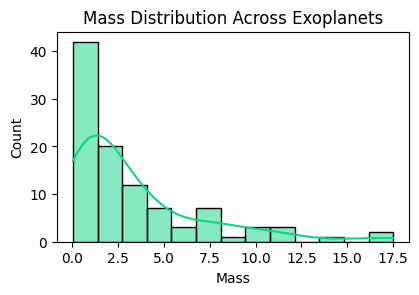

In [157]:
# Plotting a histogram of the Mass Distribution

plt.figure(figsize = (10,6))
plt.subplot(2,2,1)
sns.histplot(planet_data['Mass'], kde=True, color ='#0cd681')
plt.title('Mass Distribution Across Exoplanets')

According to the distribution of Mass and the summary statistics, it can be stated that:

*   The minimum mass of the exoplanets recorded is 0.05. It shows that the exoplanet's mass is only 0.05 times as Jupiter. The maximum mass recorded is 17.5 which shows that the exoplanet's mass is 17.5 times Jupiter's mass.

*   Within the range of 0.05 - 17.5, as per the histogram it can be seen that there are a high count of exoplanets with mass between the ranges of 0.05 - 2.5. While there is a low count as the mass range increases.



Text(0.5, 1.0, 'Period (Earth Days) Distribution Across Exoplanets')

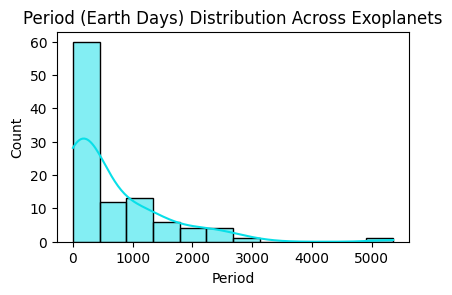

In [158]:
# Plotting a histogram of the Period (Earth Days) Distribution

plt.figure(figsize = (10,6))
plt.subplot(2,2,1)
sns.histplot(planet_data['Period'], kde=True, color ='#09dfe8')
plt.title('Period (Earth Days) Distribution Across Exoplanets')

According to the distribution of Period (Earth Days) and the summary statistics, it can be stated that:



*   The minimum number of Earth days (Period) required for an Exoplanet in the dataset to orbit around the sun is 2.985 days. So roughly a minimum of 03 earth days. The maxmimum number of Earth Days recorded is 5360. It states that to orbit around the host star that exoplanet takes 5360 earth days.

*   According to the histogram, most exoplanets in the dataset orbits around the host star, within just a period of 0 - 1000 Earth days, while a few exoplanets take longer than 5000 Earth days.





Text(0.5, 1.0, 'Eccentricity Distribution Across Exoplanets')

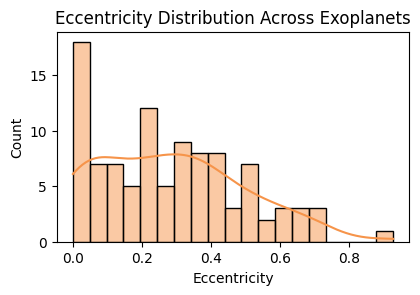

In [159]:
# Plotting a histogram of the Eccentricity Distribution

plt.figure(figsize = (10,6))
plt.subplot(2,2,1)
sns.histplot(planet_data['Eccentricity'], kde=True, binwidth=0.05, stat='count', color ='#f6944a')
plt.title('Eccentricity Distribution Across Exoplanets')


According to the distribution of Eccentricity and the summary statistics, it can be stated that:



*   The minimum eccentric recorded was 0. This indicates that the exoplanet is orbiting aroung the host star in a circular manner as opposed to an elliptical manner. Meaning there's equal distance between the host star and the exoplanet at all times. The maximum eccentric record was 0.927000, which is really high value and since it's closer to one. It can be concluded that such high range exoplanets have an elliptical orbit, making their distances vary as it orbits. (Sometimes such exoplanets will be closer to the host star and sometimes further away).

*   As per the histogram, there are a higher count of exoplanets with low eccentricity ranging from 0 to 0.4. At the same time, there are seemingly a good amount of exoplanets as well that have a higher eccentricity.



## Bivariate Relationships

Text(0.5, 1.0, 'Scatterplot Distribution Between Mass and Period')

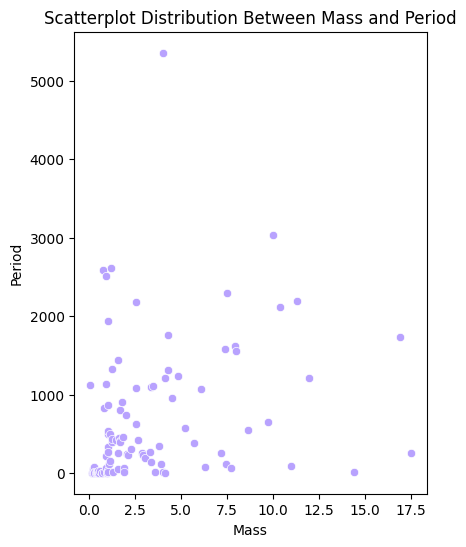

In [160]:
# Plotting a scatterplot to show the relationship between Mass and Period

plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
sns.scatterplot(x='Mass', y='Period', data= planet_data, color='#b8a2fe')
plt.title('Scatterplot Distribution Between Mass and Period')

In [161]:
# Calculating the correlation coefficient for Mass and Period
corr_coef = planet_data['Mass'].corr(planet_data['Period'])
print("Correlation Coefficient Between Mass and Period: ", corr_coef)

Correlation Coefficient Between Mass and Period:  0.26840853913532736


There is a weak positive correlation between the Mass of the exoplanet and the Orbit Period. When the Mass increases, there is a possibility that the Orbit Period also increases slightly and vice versa. However, it is a relatively weak correlation.

Text(0.5, 1.0, 'Scatterplot Distribution Between Mass and Eccentricity')

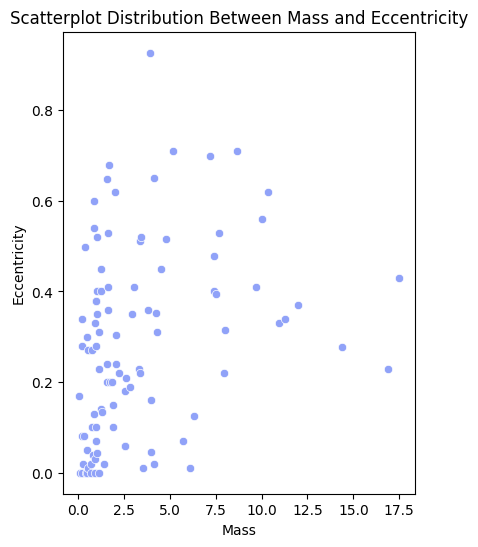

In [162]:
# Plotting a scatterplot to show the relationship between Mass and Eccentricity

plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
sns.scatterplot(x='Mass', y='Eccentricity', data= planet_data, color='#90a2f8')
plt.title('Scatterplot Distribution Between Mass and Eccentricity')

In [163]:
# Calculating the correlation coefficient for Mass and Eccentricity
corr_coef = planet_data['Mass'].corr(planet_data['Eccentricity'])
print("Correlation Coefficient Between Mass and Eccentricity: ", corr_coef)

Correlation Coefficient Between Mass and Eccentricity:  0.30493326325485154


There is a weak positive correlation between the Mass of the exoplanet and the eccentricity. When the Mass increases, there is a possibility that the eccentricity also increases slightly and vice versa. However, it is a relatively weak correlation.

Text(0.5, 1.0, 'Scatterplot Distribution Between Period and Eccentricity')

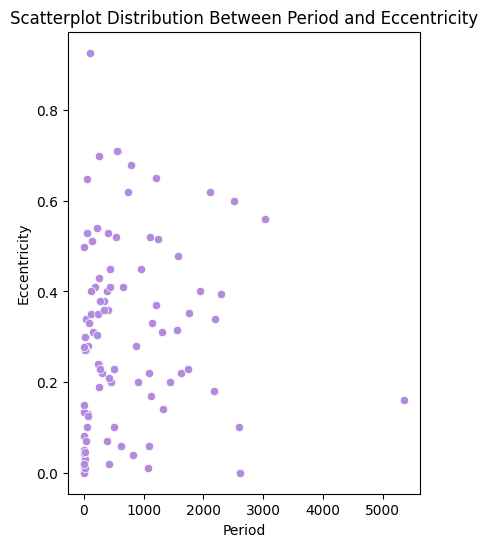

In [164]:
# Plotting a scatterplot to show the relationship between Period and Eccentricity

plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
sns.scatterplot(x='Period', y='Eccentricity', data= planet_data, color='#b28bdf')
plt.title('Scatterplot Distribution Between Period and Eccentricity')

In [165]:
# Calculating the correlation coefficient for Period and Eccentricity
corr_coef = planet_data['Eccentricity'].corr(planet_data['Period'])
print("Correlation Coefficient Between Eccentricity and Period: ", corr_coef)

Correlation Coefficient Between Eccentricity and Period:  0.14459348872788436


There is a very weak positive correlation between the Period (Earth Days) to orbit around and the eccentricity of the exoplanet. When the Period (Earth Days) increases, there is a possibility that the eccentricity also increases slightly and vice versa. However, it is a relatively very weak correlation.

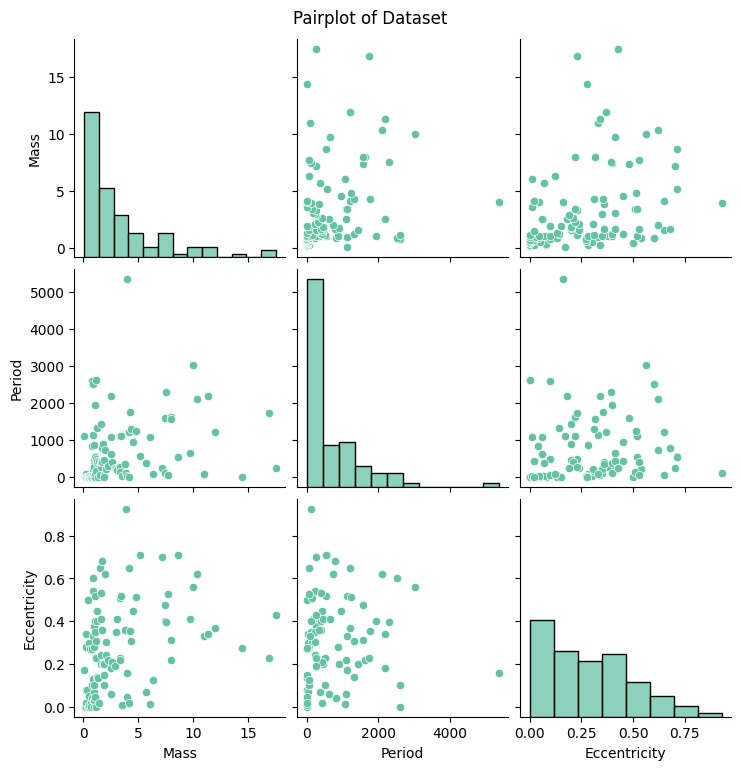

In [166]:
# Bivariate relationships using pairplot
warnings.filterwarnings("ignore")
sns.pairplot(planet_data, palette='blue')
plt.suptitle('Pairplot of Dataset', y=1.02)
plt.show()

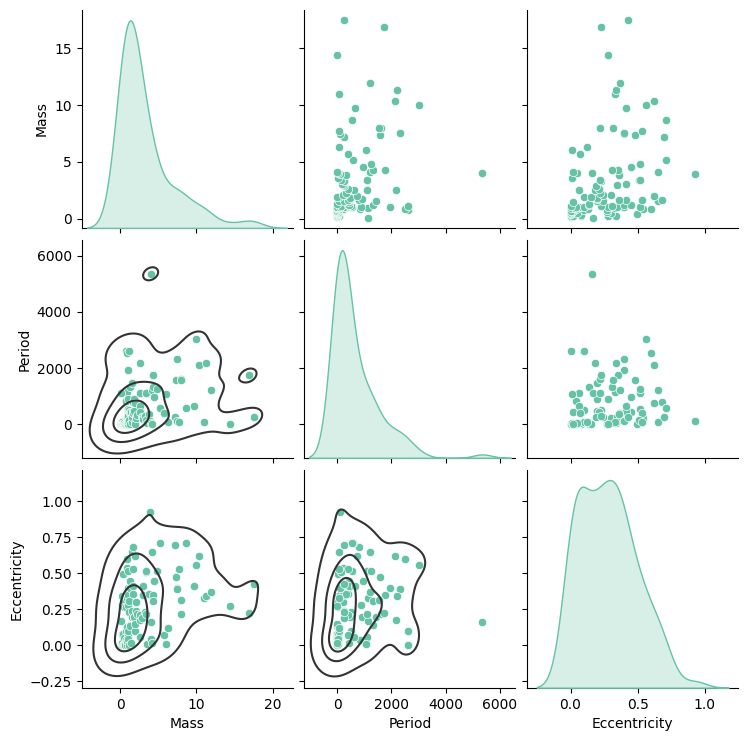

In [167]:
g = sns.pairplot(planet_data, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

All three of the distributions are right skewed distribution. Mass vs period, eccentricity vs mass and eccentricity vs period are also right skewed. mass vs eccentricity,peried vs mass and period vs eccentricity are seem to be normally distributed.

# Question (B)

### b)  Do you think standardizing the variables before clustering would be a good idea? Justify your answer.

Yes. In this case, the variables must be standardized due to the following reasons:



*   **Different Scales in the Dataset:**
The features in the dataset (Mass, Period, and Eccentricity) are measured in different scales such as Jupiter Mass, Earth Days, etc. Likewise, such features likely have different scales and variances and that could affect the clustering in particular, the distance based clustering. Clustering algorithms such as K-means use distance-based metrics to calculate cluster centroids and assign data points to clusters. If the variables have different scales or units, variables with larger scales may dominate the clustering process. Standardizing the variables brings them to a common scale, ensuring that each variable contributes equally to the clustering process.

*   **Distance Metric Variations:**
Clustering algorithms often rely on distance to cluster points based on similarity and dissimilarity. Standardizing features can prevent the features with larger scales from dominating the distance calculation.

*   **Improved Interpretability:** Standardizing variables can make the interpretation of cluster centroids more straightforward. Without standardization, it's challenging to compare the magnitude of coefficients across variables. Standardization ensures that the coefficients reflect the relative importance of variables in defining cluster centroids.

*   **Algorithm Sensitivity:** Some clustering algorithms are sensitive to the scale of variables. For example, K-means clustering is sensitive to the scale of variables because it uses Euclidean distance. Standardizing variables mitigates this sensitivity and leads to more stable and reliable clustering results.

*   **Better Convergence:** Standardizing variables can help clustering algorithms converge faster and more reliably. It can prevent issues such as numerical instability and slow convergence that may arise when variables have different scales.

# Question (C)

### c) Would you use metric-based or correlation-based distance to cluster the exoplanets? Justify your answer.

In the context of Exoplanets, the **metric-based clustering** will be a good choice. Because:


*   The features recorded in the dataset are Mass, Period and Eccentricity which are continuous numerical variables that represents physical properties of the Exoplanet. Metric based distance metrics such as Euclidean Distance and Manhattan Distance are well suited for measuring the similarity and dissimilarity between data points in a continuous feature space. These metrics are good for calculating distances based on the differences in feature values along each dimension.

*   The features of the exoplanets are likely to be independent variables. Each feature (Mass, Period, Eccentricity) represents a distinct aspect of an exoplanet's characteristics, and there may not be a direct linear relationship between them. In such cases, using metric-based distance metrics allows for capturing the overall dissimilarity between exoplanets based on their individual feature values.

*   Metric-based distances are more interpretable, and can provide intuitive measures of similarity or dissimilarity between data points in the feature space. The distance values directly reflect the differences in feature values between exoplanets, making the clustering results more interpretable in terms of the physical characteristics represented by the features.

*   Metric-based distance metrics are generally robust and widely applicable across different types of datasets. They do not rely on assumptions about the underlying distribution of the data and can handle various types of data distributions effectively.




# Question (D)

### d) standardize the variables and hierarchically cluster the exoplanets using complete linkage and Euclidean distance. Display the results using a dendogram. Cut the dendogram at a height that results in three distinct clusters. Summarize the cluster-specific means of the three variables (on the original scale) in a tabular form. Also, make pairwise scatterplots of the three variables (on the original scale) and show the three clusters in different colors.

## Standardize the Dataset

In [168]:
# Standardize the Dataset
scaler = StandardScaler()
planet_data_standardized = scaler.fit_transform(planet_data)

## Performing Heirarchical Clustering

In [169]:
# Performing Heirarchical Clustering

# Creating the linkage matrix
linkage_matrix = linkage(planet_data_standardized, method='complete', metric='euclidean')


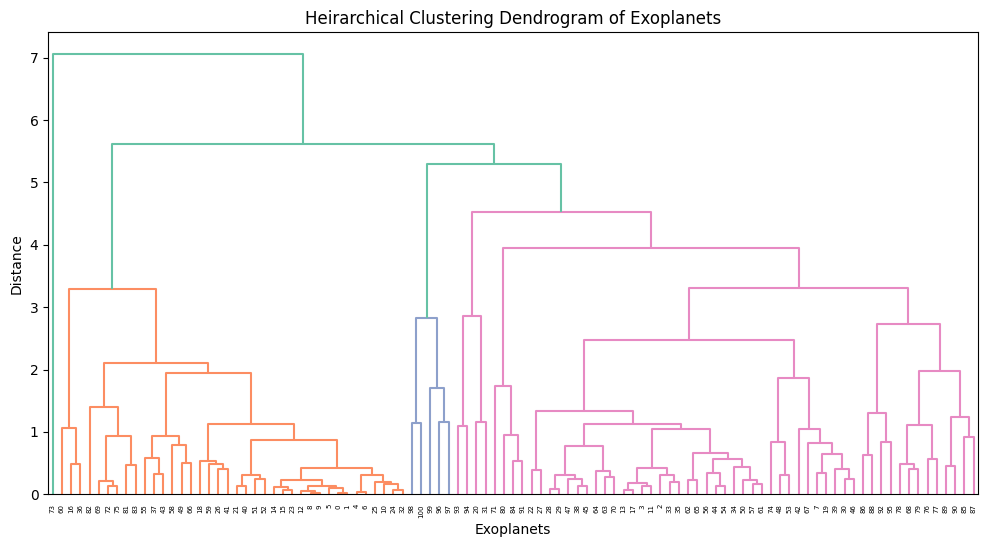

In [170]:
# Display the Full Dendrogram

plt.figure (figsize=(12,6))
dendrogram(linkage_matrix)
plt.title("Heirarchical Clustering Dendrogram of Exoplanets")
plt.xlabel('Exoplanets')
plt.ylabel('Distance')
plt.show()

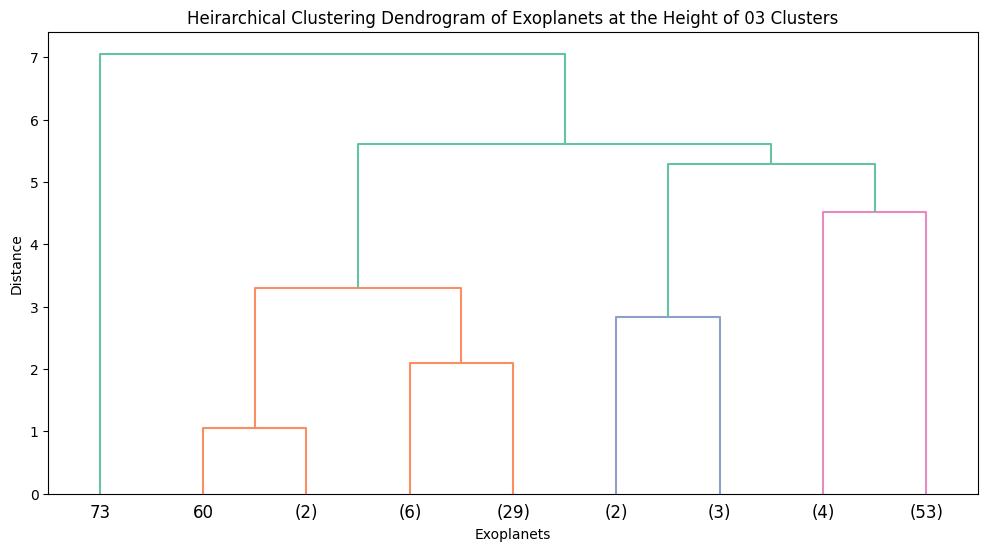

In [171]:
# Dendorgam at the Height of 03 Clusters

plt.figure (figsize=(12,6))
dendrogram(linkage_matrix, truncate_mode='level', p=3)
plt.title("Heirarchical Clustering Dendrogram of Exoplanets at the Height of 03 Clusters")
plt.xlabel('Exoplanets')
plt.ylabel('Distance')
plt.show()

### Cut the dendrogram at a height resulting in 03 clusters

In [172]:
# Cut the dendrogram at a height resulting in 03 clusters
clusters = fcluster(linkage_matrix, 3, criterion = 'maxclust')

### Cluster Summary

In [173]:
# Summarize the cluster specific means of the three variables

# Add cluster labels to the DataFrame
planet_data['Heirarchical_Cluster'] = clusters

cluster_means = planet_data.groupby('Heirarchical_Cluster').mean().reset_index()
print("Summary of the Cluster-specific means for the Three Variables (Heirarchical Clustering)")
print("")
print(cluster_means) # Cluster Summary

Summary of the Cluster-specific means for the Three Variables (Heirarchical Clustering)

   Heirarchical_Cluster      Mass       Period  Eccentricity
0                     1  1.703316   488.747927      0.070771
1                     2  4.311774   699.794116      0.412694
2                     3  4.000000  5360.000000      0.160000


### Count of planets in each cluster

In [174]:
# Count the number of data points in each cluster
cluster_counts = planet_data['Heirarchical_Cluster'].value_counts().reset_index()
cluster_counts.columns = ['Heirarchical_Cluster', 'Count']

print("Count of Data Points in Each Cluster:")
print(cluster_counts)

Count of Data Points in Each Cluster:
   Heirarchical_Cluster  Count
0                     2     62
1                     1     38
2                     3      1


### Making Pairwise Scatterplots

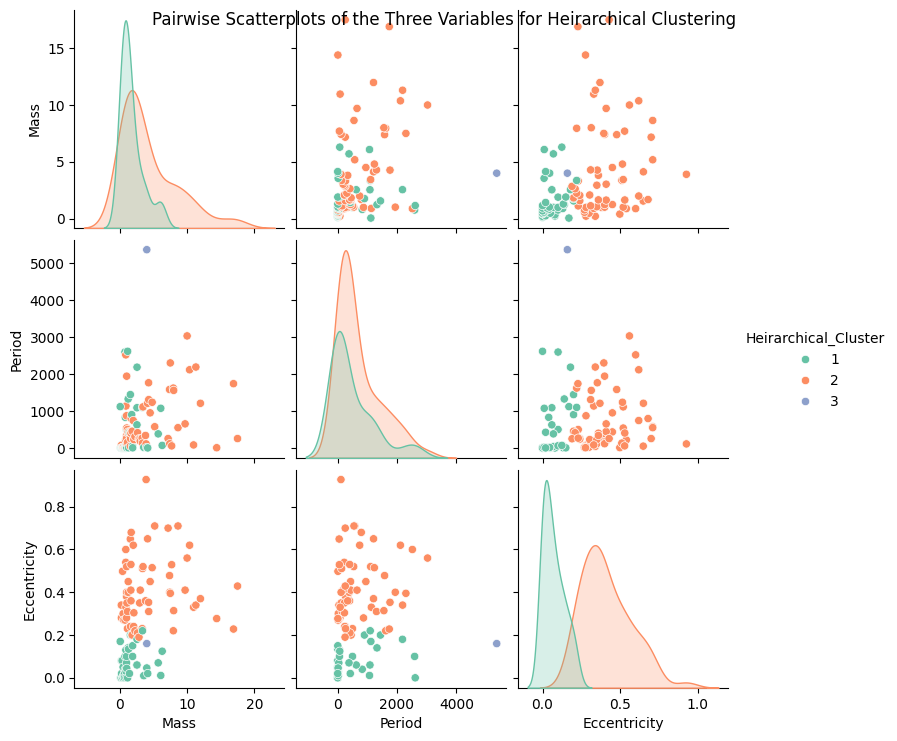

In [175]:
# Make pairwise scatterplots of the three variables and show the three clusters in different colors
sns.pairplot(planet_data, hue='Heirarchical_Cluster', palette='Set2')
plt.suptitle('Pairwise Scatterplots of the Three Variables for Heirarchical Clustering')
plt.show()

### Compute Silhouette Score

In [176]:
silhouette_avg = silhouette_score(planet_data_standardized, clusters)
print("Silhouette Score for Hierarchical Clustering:", silhouette_avg)

Silhouette Score for Hierarchical Clustering: 0.25180561304757865


### Summary

In summary, the heirarchical clustering has clustered the data points in a manner that there are 03 clusters. But cluster 03 only has one data point. The silhouette score (A metric used for assessing the quality of clustering) is only 0.25. It's not a very good score but there is a moderately good cluster.

# Question (E)

# e)  Repeat (d) using $K$-means clustering with $K=3$. (Of course, you won't have a dendogram in this case.) Compare the conclusions with (d).

In [177]:
# Create a copy
planet_data_new = planet_data.copy()
planet_data_new.drop(columns = 'Heirarchical_Cluster', inplace=True)

In [178]:
# Perform K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(planet_data_standardized)

# Get cluster adjustments
kmeans_clusters = kmeans.labels_

# Add cluster assignments to the original dataframe
planet_data_new['KMeans_Cluster'] = kmeans_clusters
planet_data_new['KMeans_Cluster'] = kmeans_clusters + 1

### Cluster Summary

In [179]:
# Summarize the cluster specific means of the three variables

cluster_means = planet_data_new.groupby('KMeans_Cluster').mean().reset_index()
print("Summary of the Cluster-specific means for the Three Variables (KMeans)")
print("")
print(cluster_means) # Cluster Summary

Summary of the Cluster-specific means for the Three Variables (KMeans)

   KMeans_Cluster       Mass       Period  Eccentricity
0               1   1.644000   420.610023      0.125987
1               2   3.010000   633.403242      0.500061
2               3  10.567857  1693.172014      0.366500


### Count of planets in each cluster


In [180]:
# Count the number of data points in each cluster
cluster_counts = planet_data_new['KMeans_Cluster'].value_counts().reset_index()
cluster_counts.columns = ['KMeans_Cluster', 'Count']

print("Count of Data Points in Each Cluster:")
print(cluster_counts)

Count of Data Points in Each Cluster:
   KMeans_Cluster  Count
0               1     54
1               2     33
2               3     14


### Making Pairwise Scatterplots

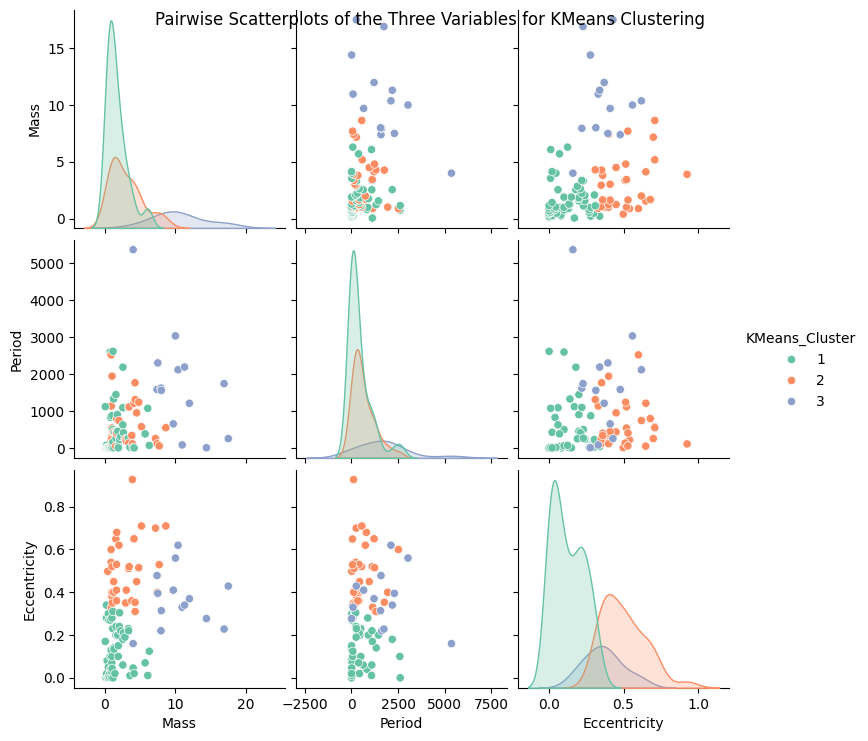

In [181]:
# Make pairwise scatterplots of the three variables and show the three clusters in different colors
sns.pairplot(planet_data_new, hue='KMeans_Cluster', palette='Set2')
plt.suptitle('Pairwise Scatterplots of the Three Variables for KMeans Clustering')
plt.show()

### Silhouette Score

In [182]:
silhouette_avg = silhouette_score(planet_data_standardized, kmeans_clusters)
print("Silhouette Score for KMeans Clustering:", silhouette_avg)

Silhouette Score for KMeans Clustering: 0.3571111540150853


In summary, the KMeans clustering has clustered the data points in a manner that there are 03 clusters. But cluster 03 only has one data point. The silhouette score (A metric used for assessing the quality of clustering) is only 0.35. It's not a very good score but there is a moderately good cluster.

# Comparison Between the Heirarchical and KMeans Clustering Algorithms

By comparing the cluster summaries, pairplots and the silhouette scores for both heirarchical and k-means clustering algorithms, the following can be concluded:


*   The cluster summaries for both clustering techniques seem similar with only a small variation in values. According to the cluster summaries the following can be seen:
    *   **Cluster 01** - Consists of exoplanets with low mass, an average Orbit time period of 300-500 earth days and very low eccentricity meaning their orbit around the host star is closer to a circle.

    *   **Cluster 02** - Consists of exoplanets with moderate mass, an average Orbit time period of 600-700 earth days and a moderate eccentricity meaning their orbit around the host star is not a circle but leans more towards an elliptical style.

    *   **Cluster 03** - Consists of exoplanets with large mass, an average Orbit time period of 1000-5000 earth days and very high eccentricity meaning their orbit style around the host star varies and is highly elliptical.

*   The count for each cluster is different based on the clustering algorithm. In heirarchical clustering cluster 03 only consisted of 01 datapoint which is not very accurate as it can even be an outlier. However, in Kmeans clustering, the cluster 03 consists of 14 datapoints.

*   The pairplots are similar in nature except for the cluster 03 as there is a high degree of difference in that particular cluster across the two clustering algorithms.

*   When comparing Silhouette Score (A metric used to measure the goodness of fit), for the heirarchical clustering the score was comparatively low than for the KMeans clustering. Although the Kmeans clustering is also not the best as it only has a score of 0.35, but it is higher than the score for heirarchical clustering which only has a score of 0.25.

*   Therefore, it can be concluded that the **K-Means clustering proved to be a much better clustering method** when clustering the exoplanets. However, it should be noted that more evaluations and testings should be done to conduct a more thorough assesment.


